In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import mannwhitneyu

In [3]:
df = pd.read_csv (r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Wine.csv")
df

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,Barbera,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,Barbera,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Очистка от выбросов и пропусков

In [5]:
#проверка на пропуски, пропуски отсутствуют.
df.isna().sum()

class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64

In [9]:
#проверка на выбросы
df.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [279]:
#Определяем интервал для выбросов (специально взял очень маленький интервал)
q1 = df['alcohol'].quantile(0.40)
q3 = df['alcohol'].quantile(0.60)
iqr = q3 - q1
lowr_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print (f'Выбросами будут считаться вся продукция(Вино), процент алкоголя в которых находится за пределами интервала [{lowr_bound},{upper_bound}]')

Выбросами будут считаться вся продукция(Вино), процент алкоголя в которых находится за пределами интервала [11.977,14.065000000000001]


In [31]:
#Выбросы
df[(df['alcohol']<=lowr_bound)|(df['alcohol']>=upper_bound)]

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,Barolo,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,Barolo,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
8,1,Barolo,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
10,1,Barolo,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
11,1,Barolo,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
13,1,Barolo,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
14,1,Barolo,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
16,1,Barolo,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280


In [35]:
#убарл выбросы
df_ejection=df[(df['alcohol']>=lowr_bound)&(df['alcohol']<=upper_bound)]
df_ejection

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
7,1,Barolo,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
9,1,Barolo,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,Barbera,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,Barbera,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835


# Для переменных df_Barolo и df_Grignolino найти 95% доверительные интервалы средних значений

In [37]:
df_ejection['class_name'].unique()

array(['Barolo', 'Grignolino', 'Barbera'], dtype=object)

In [141]:
df_Barolo = df_ejection[df_ejection['class_name']=='Barolo']['alcohol']

df_Grignolino = df_ejection[df_ejection['class_name']=='Grignolino']['alcohol']


In [145]:
print(df_Barolo.mean(), df_Grignolino.mean())

13.533720930232557 12.503653846153846


In [156]:
alpha = 0.05
stats.norm.interval(confidence = 1-alpha, loc = df_Barolo.mean(), scale = np.sqrt(df_Barolo.var()/len(df_Barolo)))

(13.434180732211647, 13.633261128253466)

##### Для переменной df_Barolo собранные данные не будут противоречить распределениям случайной величины с математическим ожиданием от 13.43 до 13.63 см с вероятностью 95%

In [154]:
stats.norm.interval(confidence = 1-alpha, loc = df_Grignolino.mean(), scale = np.sqrt(df_Grignolino.var()/len(df_Grignolino)))

(12.385911944792444, 12.621395747515248)

##### Для переменной df_Grignolino собранные данные не будут противоречить распределениям случайной величины с математическим ожиданием от 12.38 до 12.62 см с вероятностью 95%

# Проверка на нормальность визуальная, тест Шапиро-Уилка и тест Андерсона-Дарлинга

Barolo mean(средняя) 13.533720930232557
Barolo median(медиана) 13.58
Barolo skew(скошенность) -0.3259853594661334
Barolo kurtosis(эксцесс) -1.010363900730503
Grignolino mean(средняя) 12.503653846153846
Grignolino median(медиана) 12.37
Grignolino skew(скошенность) 1.3006622062934154
Grignolino kurtosis(эксцесс) 1.3277261629779504


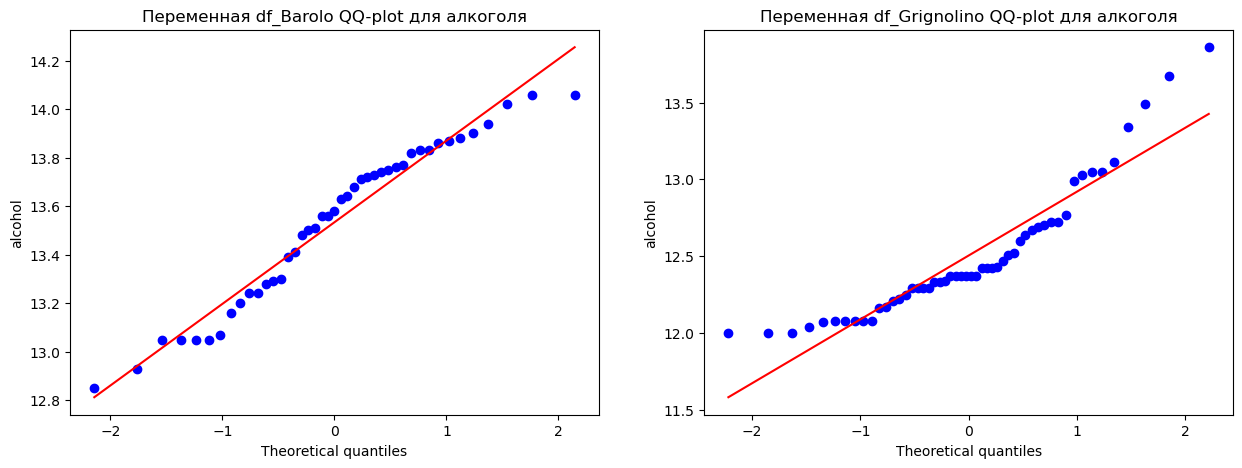

In [340]:
print('Barolo mean(средняя)',df_Barolo.mean())
print('Barolo median(медиана)',df_Barolo.median())
print('Barolo skew(скошенность)',stats.skew(df_Barolo))
print('Barolo kurtosis(эксцесс)',stats.kurtosis(df_Barolo))
print('Grignolino mean(средняя)',df_Grignolino.mean())
print('Grignolino median(медиана)',df_Grignolino.median())
print('Grignolino skew(скошенность)',stats.skew(df_Grignolino))
print('Grignolino kurtosis(эксцесс)',stats.kurtosis(df_Grignolino))
fig, ax = plt.subplots(1,2, figsize = (15,5))
stats.probplot(df_Barolo, dist="norm", plot = ax[0])
stats.probplot(df_Grignolino, dist="norm", plot = ax[1])
ax[0].set_title('Переменная df_Barolo QQ-plot для алкоголя')
ax[0].set_ylabel('alcohol')
ax[1].set_title('Переменная df_Grignolino QQ-plot для алкоголя')
ax[1].set_ylabel('alcohol')
plt.show()

In [158]:
stats.shapiro(df_Barolo)

ShapiroResult(statistic=0.951265943180837, pvalue=0.06630924110359562)

In [174]:
stats.shapiro(df_Barolo)[1]>alpha

True

In [194]:
stats.shapiro(df_Grignolino)

ShapiroResult(statistic=0.8738614662884986, pvalue=5.4007145274279416e-05)

##### переменная df_Barolo имеет нормальное распределение

In [182]:
stats.shapiro(df_Grignolino)[1]>alpha

False

##### для переменной df_Grignolino распределение нельзя считать нормальным

In [262]:
#тест Андерсона-Дарлинга
print('statistic:',stats.anderson(df_Barolo,dist='norm').statistic)
print('critical_values for significance_level 5%:',stats.anderson(df_Barolo,dist='norm').critical_values[2])
print('Гипотеза',stats.anderson(df_Barolo,dist='norm').statistic<stats.anderson(df_Barolo,dist='norm').critical_values[2])

statistic: 0.7189288463152295
critical_values for significance_level 5%: 0.729
Гипотеза True


##### для переменной df_Barolo при уровне значимости 5% критическое значение 0.729 статистика 0.718. статистика меньше критического значения для уровня значимости 5% значит гипотеза верна и распределение нормальное

In [264]:
print('statistic:',stats.anderson(df_Grignolino,dist='norm').statistic)
print('critical_values for significance_level 5%:',stats.anderson(df_Grignolino,dist='norm').critical_values[2])
print('Гипотеза',stats.anderson(df_Grignolino,dist='norm').statistic<stats.anderson(df_Grignolino,dist='norm').critical_values[2])

statistic: 2.024853317386267
critical_values for significance_level 5%: 0.737
Гипотеза False


##### для переменной df_Grignoli при уровне значимости 5% критическое значение 0.737 статистика 2.024. Статистика больше критического значения для уровня значимости 5% значит гипотеза не верна и распределение нельзя считать нормальным

# Сравнение не нормальных выборок

In [357]:
stats.mannwhitneyu(df_Barolo,df_Grignolino,alternative ='two-sided')

MannwhitneyuResult(statistic=2126.5, pvalue=4.7102757280597923e-14)

In [365]:
stats.mannwhitneyu(df_Barolo,df_Grignolino,alternative ='two-sided')[1]<alpha

True

##### p = 4.71 < 5%, нулевая гипотеза о том, что распределение алкоголя в вине Barolo и Grignolino совподают отвергается. Процент алкоголья в винах не равный.

# Постройте точечную диаграмму (scatterplot) и оцените корреляцию между переменными.Сделайте вывод.


ValueError: x and y must be the same size

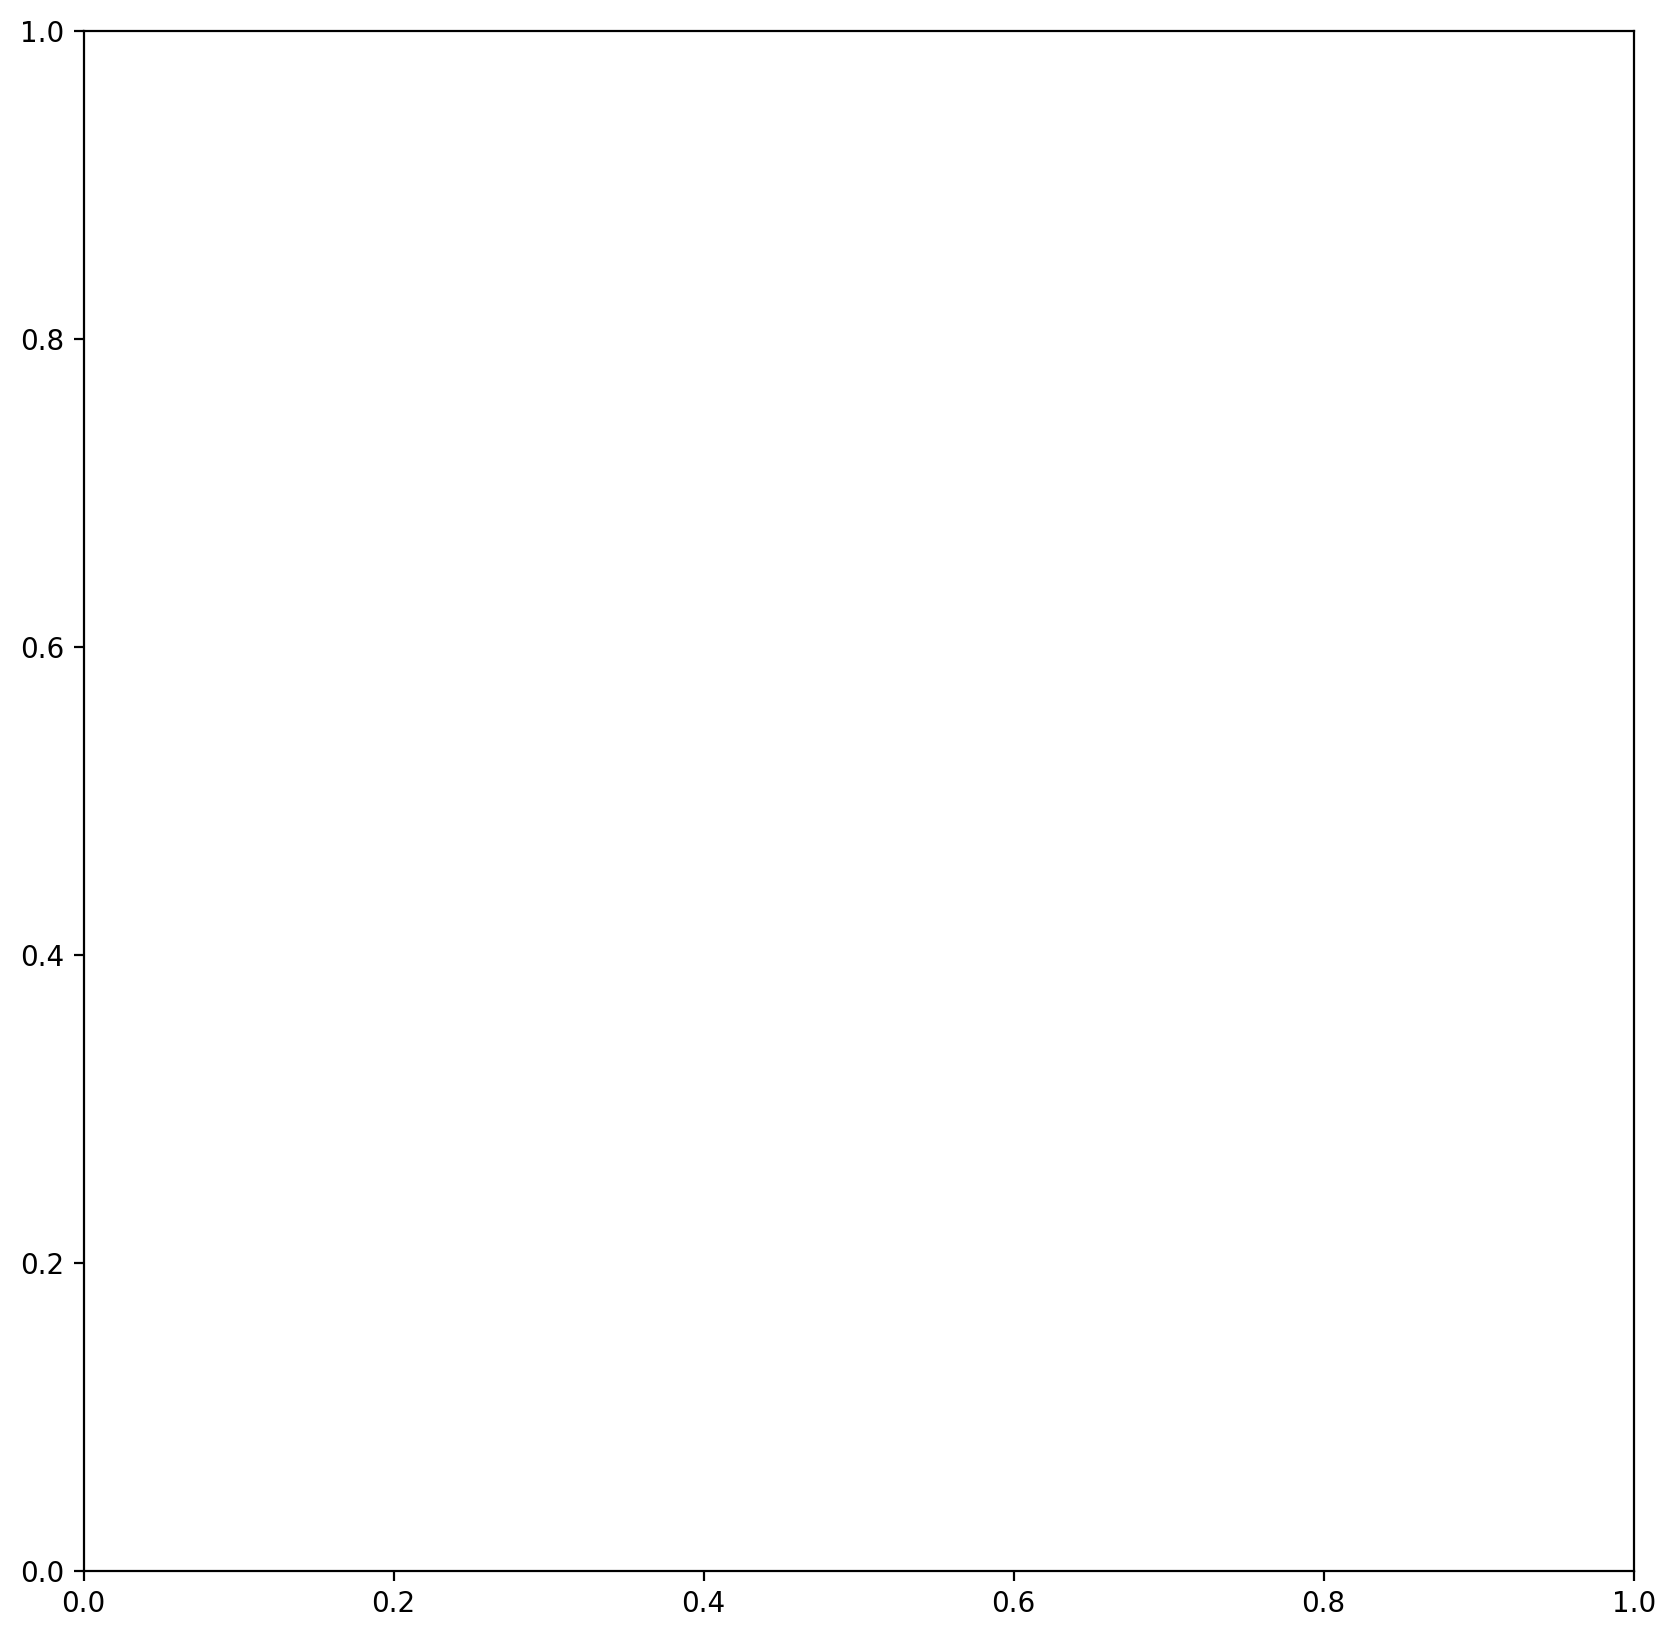

In [387]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
plt.scatter(df_Barolo, df_Grignolino)
plt.scatter(df_Grignolino, df_Barolo)
for r in df.itertuples():    
    ax.annotate(r[1], (r[2], r[3]))
    ax.annotate(r[4], (r[5], r[6])) 